In [1]:
%pylab inline
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
from IPython.display import display
import snap

Populating the interactive namespace from numpy and matplotlib


In [ ]:
str_gpd = gpd.read_file('Street_Segments.geojson')
segid_in_st_data = set(pd.unique(str_gpd.STREETSEGID))
print str_gpd.shape
str_gpd.head()

In [3]:
str_gpd_obj = str_gpd[['OBJECTID','geometry']]
joined = sjoin(str_gpd_obj, str_gpd_obj)

segments that intersect with 2819 (the green one)

,BEGINMEASURE,DIRECTIONALITY,ENDMEASURE,FACILITYID,FROMADDRESSLEFTTHEO,FROMADDRESSRIGHTTHEO,FROMNODEID,OBJECTID,OBJECTID_1,QUADRANT,...,SHAPE_Length,SOURCEID,STREETID,STREETSEGID,STREETTYPE,TOADDRESSLEFTTHEO,TOADDRESSRIGHTTHEO,TONODEID,UPDATETIMESTAMP,geometry
2818,0,2,56.966732,SEGID-6832,38,47,22079,2819,3199,NW,...,56.966716,13906005,103906,6832,ST,66,67,22102,2005-11-01T12:55:47,LINESTRING (-77.01066020369781 38.952369300992...


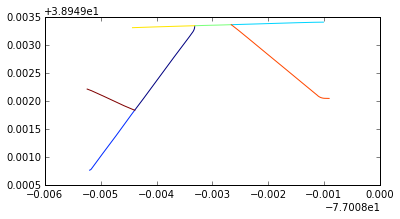

In [4]:
str_gpd[str_gpd.OBJECTID.isin([2819,1,2818,2820,3267,3268,87])].plot()
str_gpd[str_gpd.OBJECTID==2819]

In [5]:
# exclude self-intersected pairs
street_pairs = joined[joined.OBJECTID_left!=joined.OBJECTID_right][['OBJECTID_right','OBJECTID_left']]

In [6]:
nodes_in_graph = list(pd.unique(street_pairs.OBJECTID_left.append(street_pairs.OBJECTID_right)))
nodes_in_graph = [int(x) for x in nodes_in_graph]
edges_in_graph = street_pairs.values.tolist()

In [7]:
road_network = snap.TUNGraph.New()
for n in nodes_in_graph:
    road_network.AddNode(n)
for a,b in edges_in_graph:
    road_network.AddEdge(a,b)

In [8]:
btw_nodes= snap.TIntFltH()
btw_edges = snap.TIntPrFltH()
snap.GetBetweennessCentr(road_network, btw_nodes, btw_edges)

In [15]:
for cnt, node in enumerate(road_network.Nodes()):
    print "segment id %d with degree: %d, Betweenness: %f" % (node.GetId(), node.GetInDeg(), btw_nodes[node.GetId()])
    if cnt > 10:
        break
        
for cnt, edge in enumerate(btw_edges):
    print "intesection: (%d, %d) centrality: %f" % (edge.GetVal1(), edge.GetVal2(), btw_edges[edge])
    if cnt>10:
        break


segment id 1 with degree: 4, Betweenness: 60389.875463
segment id 2818 with degree: 5, Betweenness: 1983.315671
segment id 2820 with degree: 5, Betweenness: 75103.393799
segment id 3267 with degree: 4, Betweenness: 152648.332773
segment id 17 with degree: 7, Betweenness: 15222.088428
segment id 87 with degree: 3, Betweenness: 12315.197992
segment id 3269 with degree: 7, Betweenness: 71292.418176
segment id 5786 with degree: 7, Betweenness: 87959.981235
segment id 5787 with degree: 7, Betweenness: 123418.414006
segment id 3099 with degree: 4, Betweenness: 7854.480299
segment id 3268 with degree: 6, Betweenness: 37183.692382
segment id 2819 with degree: 4, Betweenness: 144316.270763
intesection: (1, 87) centrality: 41482.581704
intesection: (1, 2819) centrality: 136856.207016
intesection: (1, 2820) centrality: 4869.497019
intesection: (1, 3268) centrality: 85389.216112
intesection: (2818, 2819) centrality: 2902.560704
intesection: (2818, 3267) centrality: 9892.426393
intesection: (2818, 